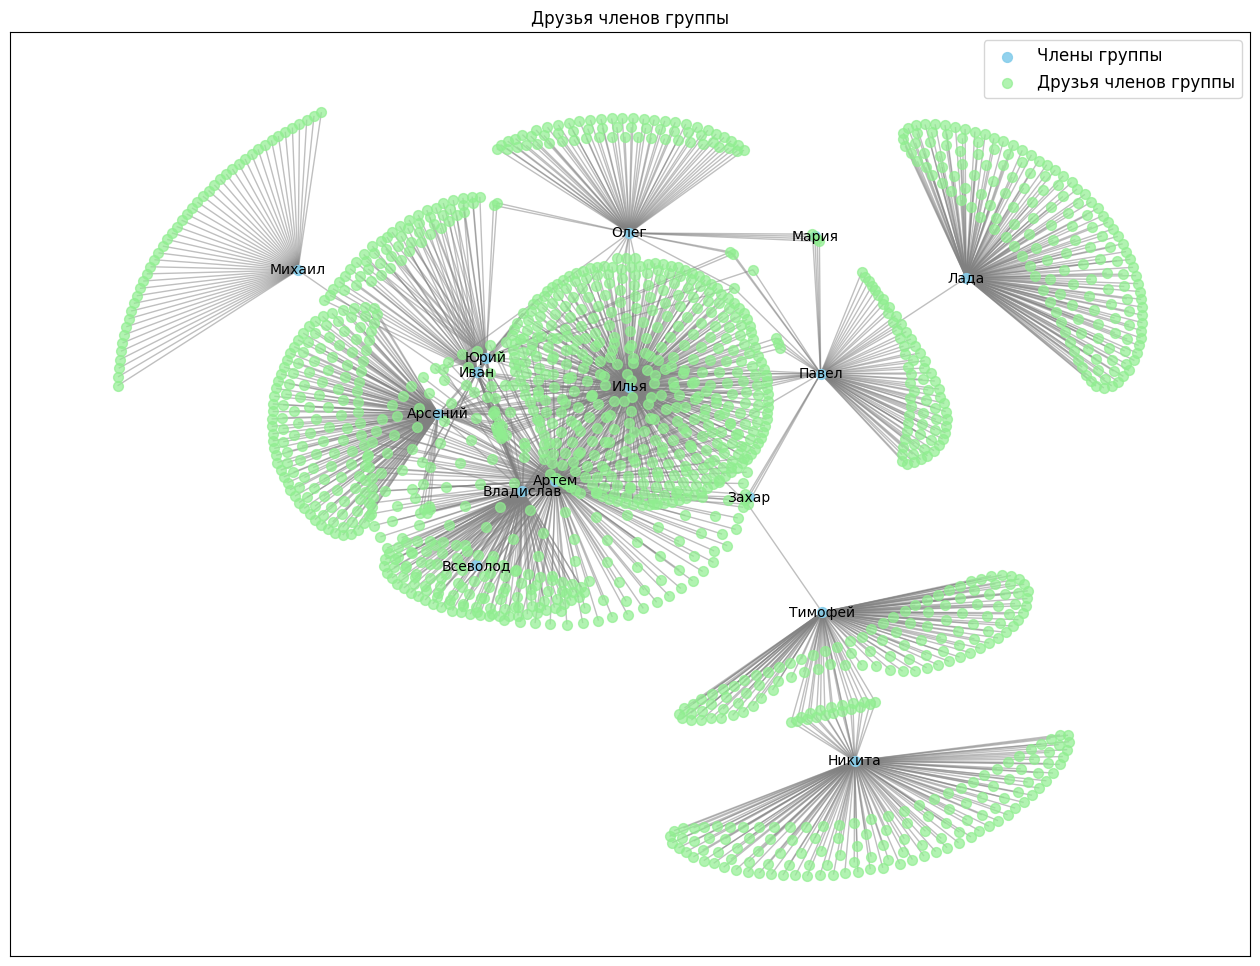

In [1]:
import yaml
import networkx as nx
import matplotlib.pyplot as plt

GRAPH_FILENAME = 'foc.yaml'

id_to_name = {
    225790978: "Владислав",
    752279211: "Всеволод",
    202377873: "Тимофей",
    138716736: "Илья",
    306787585: "Мария",
    202038842: "Олег",
    352418484: "Михаил",
    142470714: "Захар",
    203626707: "Юрий",
    218147810: "Артем",
    253647021: "Павел",
    210835290: "Никита",
    175952275: "Иван",
    206038535: "Арсений",
    178728261: "Лада"
}

with open(GRAPH_FILENAME, "r") as file:
    data = yaml.safe_load(file)

G = nx.DiGraph() if data.get('directed', False) else nx.Graph()

for node in data['nodes']:
    G.add_node(node['id'])

for link in data['links']:
    G.add_edge(link['source'], link['target'])

plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(G)

group_members = set(id_to_name.keys())
other_users = set(G.nodes()) - group_members

labels = {node: id_to_name.get(node, str(node)) for node in G.nodes if node in id_to_name}

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=group_members, node_size=50, node_color='skyblue', alpha=0.9, label="Члены группы")
nx.draw_networkx_nodes(G, pos, nodelist=other_users, node_size=50, node_color='lightgreen', alpha=0.7, label="Друзья членов группы")
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black') 
plt.title("Друзья членов группы")
plt.legend(scatterpoints=1, loc='best', fontsize=12)
plt.savefig("foc.png")

plt.show()
